In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_raw/df_final_demo.txt")

In [4]:
dc = pd.read_csv("https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_cleaned/df_final_clients.csv")

In [6]:
dc

,Unnamed: 0,client_id,Variation
0,0,9988021,Test
1,1,8320017,Test
2,2,4033851,Control
3,3,1982004,Test
4,4,9294070,Control
...,...,...,...
50495,50495,393005,Control
50496,50496,2908510,Control
50497,50497,7230446,Test
50498,50498,5230357,Test


In [7]:
dc.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
dc

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [9]:
df #df initial: 70609 rows × 9 columns

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [10]:
df_merged = pd.merge(df , dc , on = "client_id", how = "left")

In [11]:
df_merged 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [12]:
df_AB_demo = df_merged.dropna(subset=['Variation'])

In [13]:
df_AB_demo #50,500

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [3]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [4]:
df.shape 

(70609, 9)

In [5]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [6]:
df.client_id.dtype

dtype('int64')

In [7]:
df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [8]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [9]:
df["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [11]:
mapping = {
    'U': 'Unknown',
    'M': 'Male',
    'F': 'Female',
    'X': 'Other'
}

# Replace the categories
df['gendr'] = df['gendr'].replace(mapping)

# Handle NaN values if needed
df['gendr'] = df['gendr'].fillna('Not Specified')

print (df['gendr'])

0        Unknown
1        Unknown
2        Unknown
3           Male
4         Female
          ...   
70604    Unknown
70605       Male
70606     Female
70607       Male
70608     Female
Name: gendr, Length: 70609, dtype: object


In [18]:
df = df[~df['gendr'].isin(['Not Specified', 'Other'])]

In [19]:
print (df['gendr'])

0        Unknown
1        Unknown
2        Unknown
3           Male
4         Female
          ...   
70604    Unknown
70605       Male
70606     Female
70607       Male
70608     Female
Name: gendr, Length: 70592, dtype: object


In [20]:
df.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [21]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70592
bal                 70330
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [22]:
# moving on to data cleaning 

# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

clnt_age            1
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [23]:
#removing duplicates
df.drop_duplicates(inplace=True)

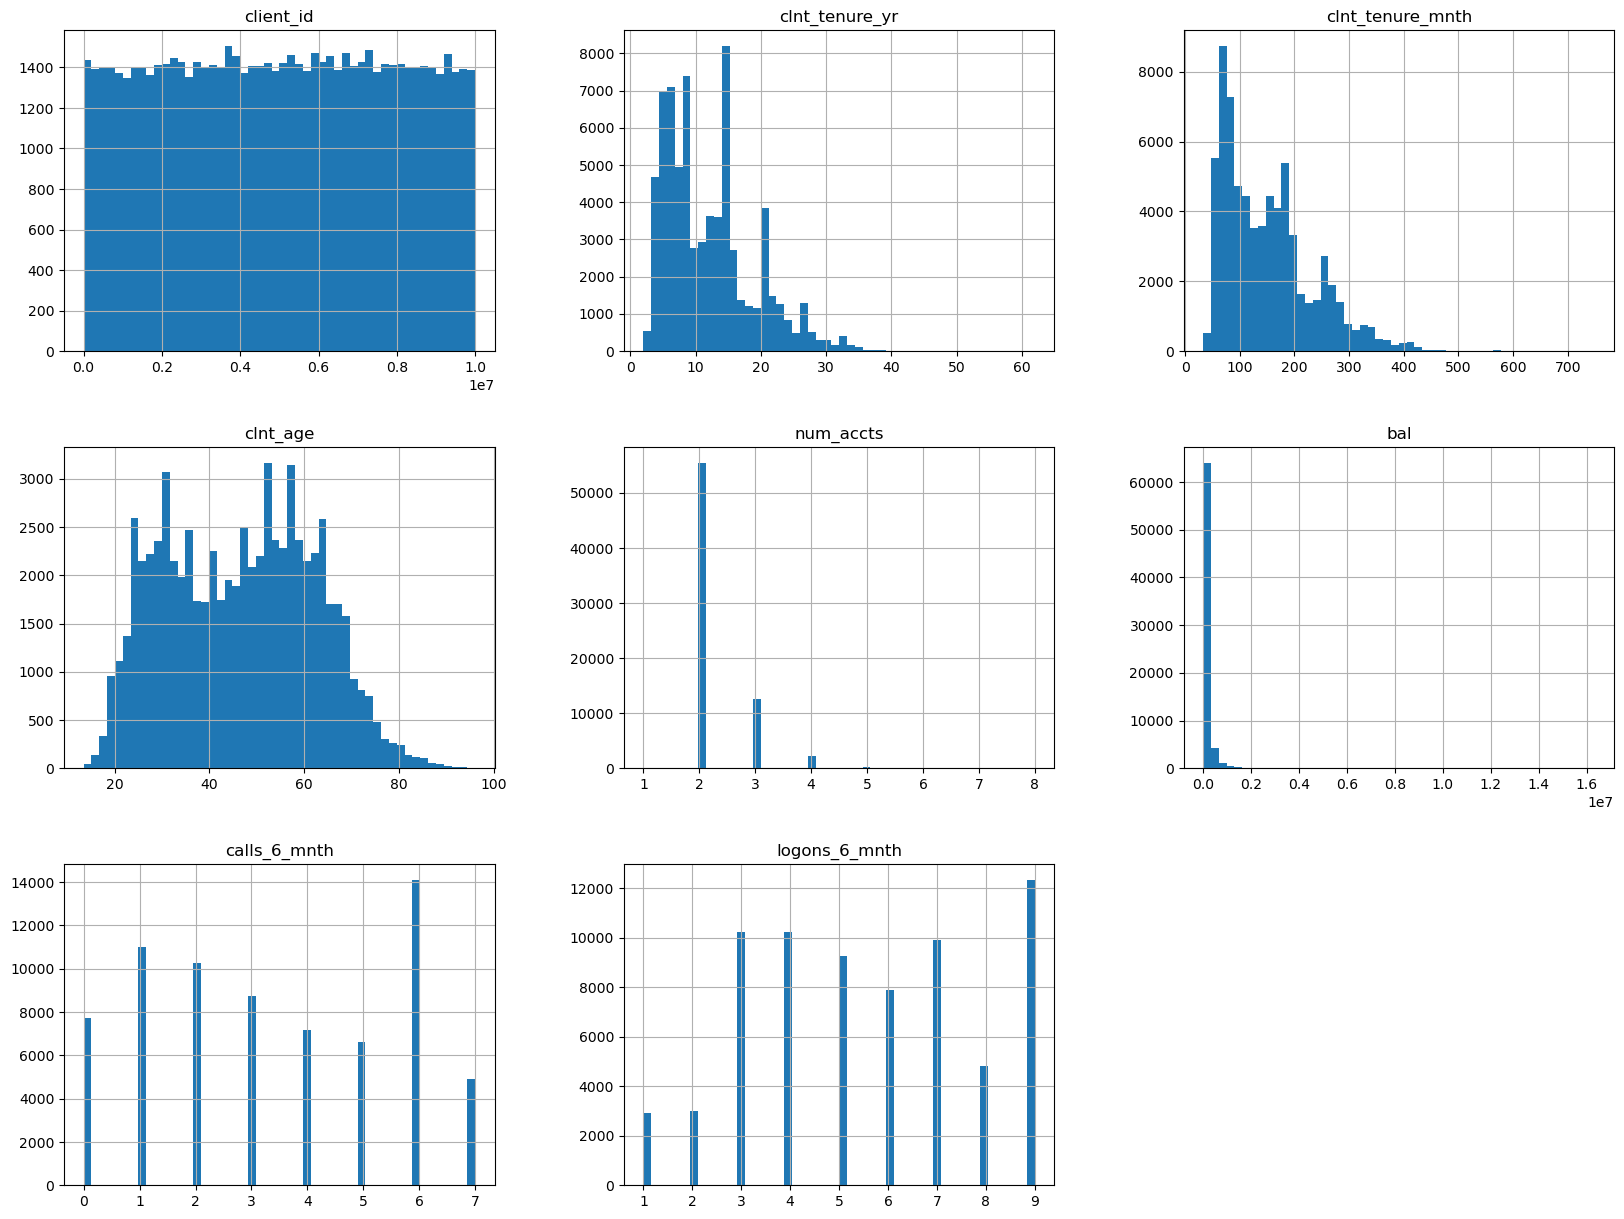

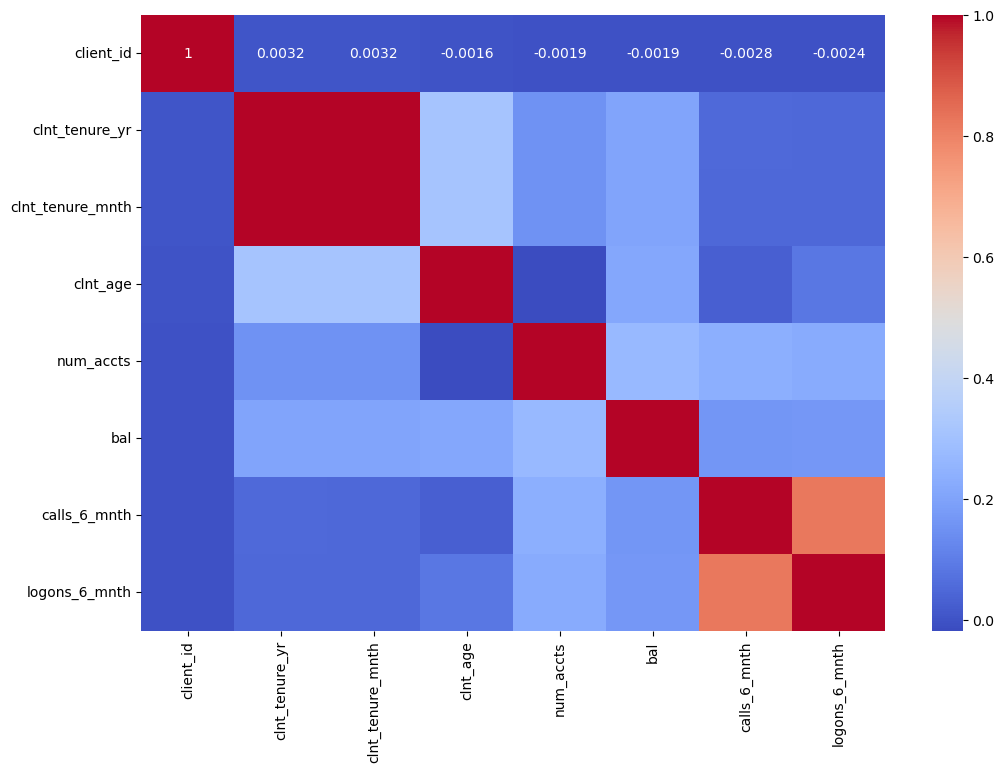

In [24]:
#Removing non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Basic Data Visualization

# Plotting distributions of numerical features
numeric_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Plotting correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

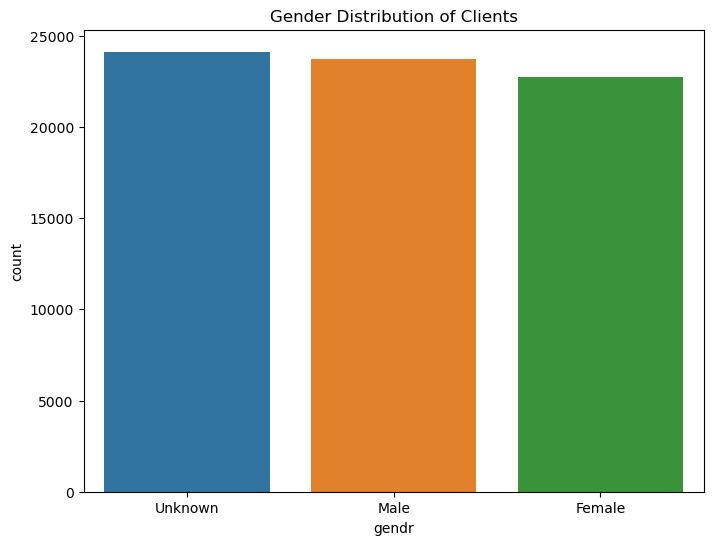

In [25]:
#business question of the day
#1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='')
plt.title('Gender Distribution of Clients')
plt.show()

In [31]:

# Calculate the mean of the age distribution
mean_age = df['clnt_age'].mean()

# Calculate the mode of the age distribution
mode_age = df['clnt_age'].mode()[0]

# Print the mean and mode
print(f'The mean age of clients is: {mean_age:.2f} years')
print(f'The mode age of clients is: {mode_age:.2f} years')

The mean age of clients is: 46.44 years
The mode age of clients is: 58.50 years


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


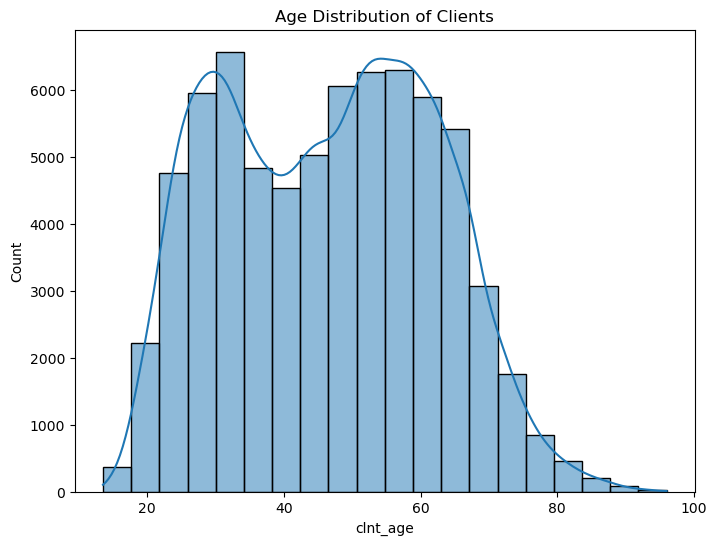

In [26]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='clnt_age', bins=20, kde=True)
plt.title('Age Distribution of Clients')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


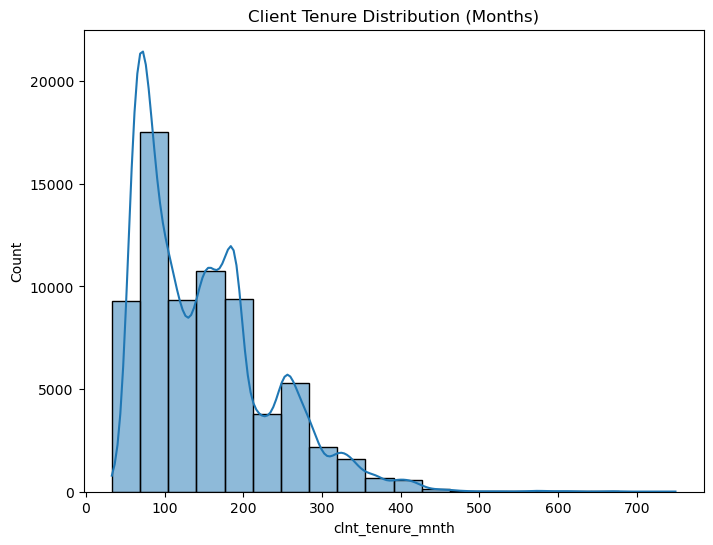

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


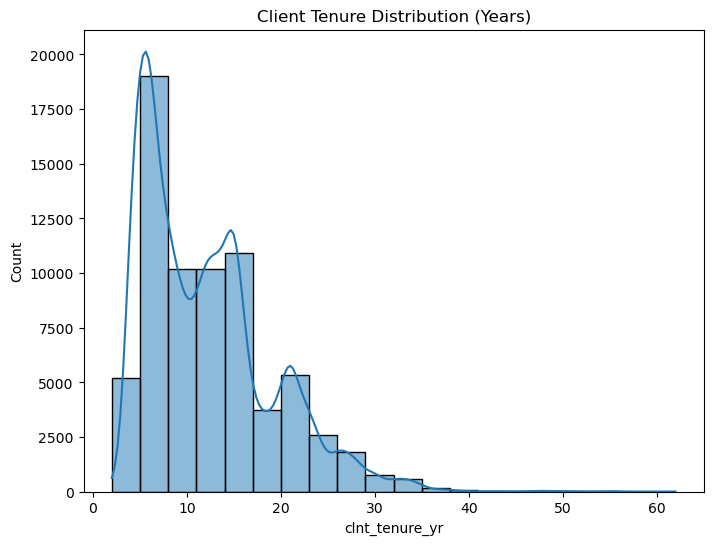

In [27]:
# Tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='clnt_tenure_mnth', bins=20, kde=True)
plt.title('Client Tenure Distribution (Months)')
plt.show()

# Tenure distribution in years
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='clnt_tenure_yr', bins=20, kde=True)
plt.title('Client Tenure Distribution (Years)')
plt.show()


The mean tenure of clients is: 150.66 months


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


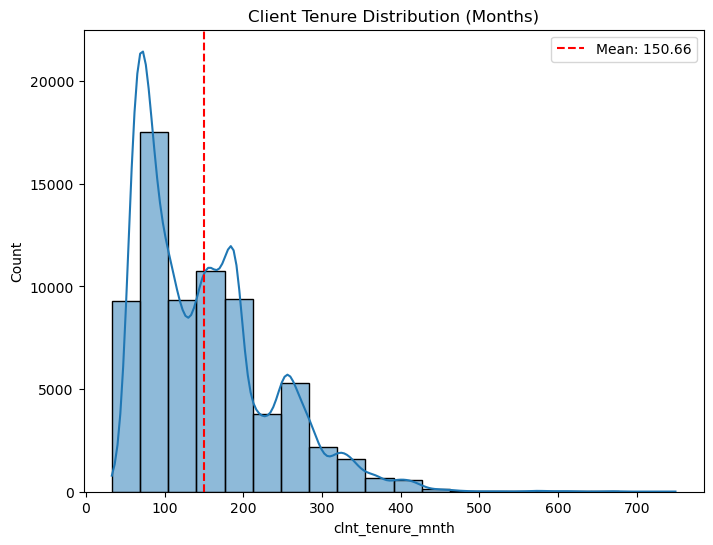

In [32]:
# Calculate the mean of the tenure distribution in months
mean_tenure_mnth = df['clnt_tenure_mnth'].mean()

# Print the mean tenure in months
print(f'The mean tenure of clients is: {mean_tenure_mnth:.2f} months')

# Plot the tenure distribution in months
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='clnt_tenure_mnth', bins=20, kde=True)
plt.axvline(mean_tenure_mnth, color='r', linestyle='--', label=f'Mean: {mean_tenure_mnth:.2f}')
plt.title('Client Tenure Distribution (Months)')
plt.legend()
plt.show()

In [28]:
# Calculate average age of clients
average_age = df['clnt_age'].mean()
print(f'The average age of clients is: {average_age:.2f} years')


The average age of clients is: 46.44 years


In [29]:
# Segmenting clients by age groups
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels)



/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


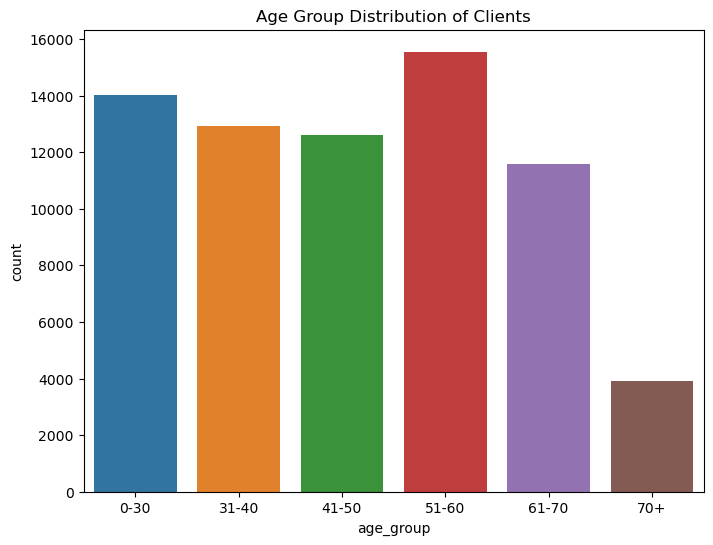

In [30]:
# Age group distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group')
plt.title('Age Group Distribution of Clients')
plt.show()


In [ ]:
# Insights:
#Age: The primary clients tend to be older, with the mean age of clients is: 46.44 years based on the age distribution.
#Tenure: The primary clients are generally long-standing, with an 150 months mean as indicated by the tenure distribution.

